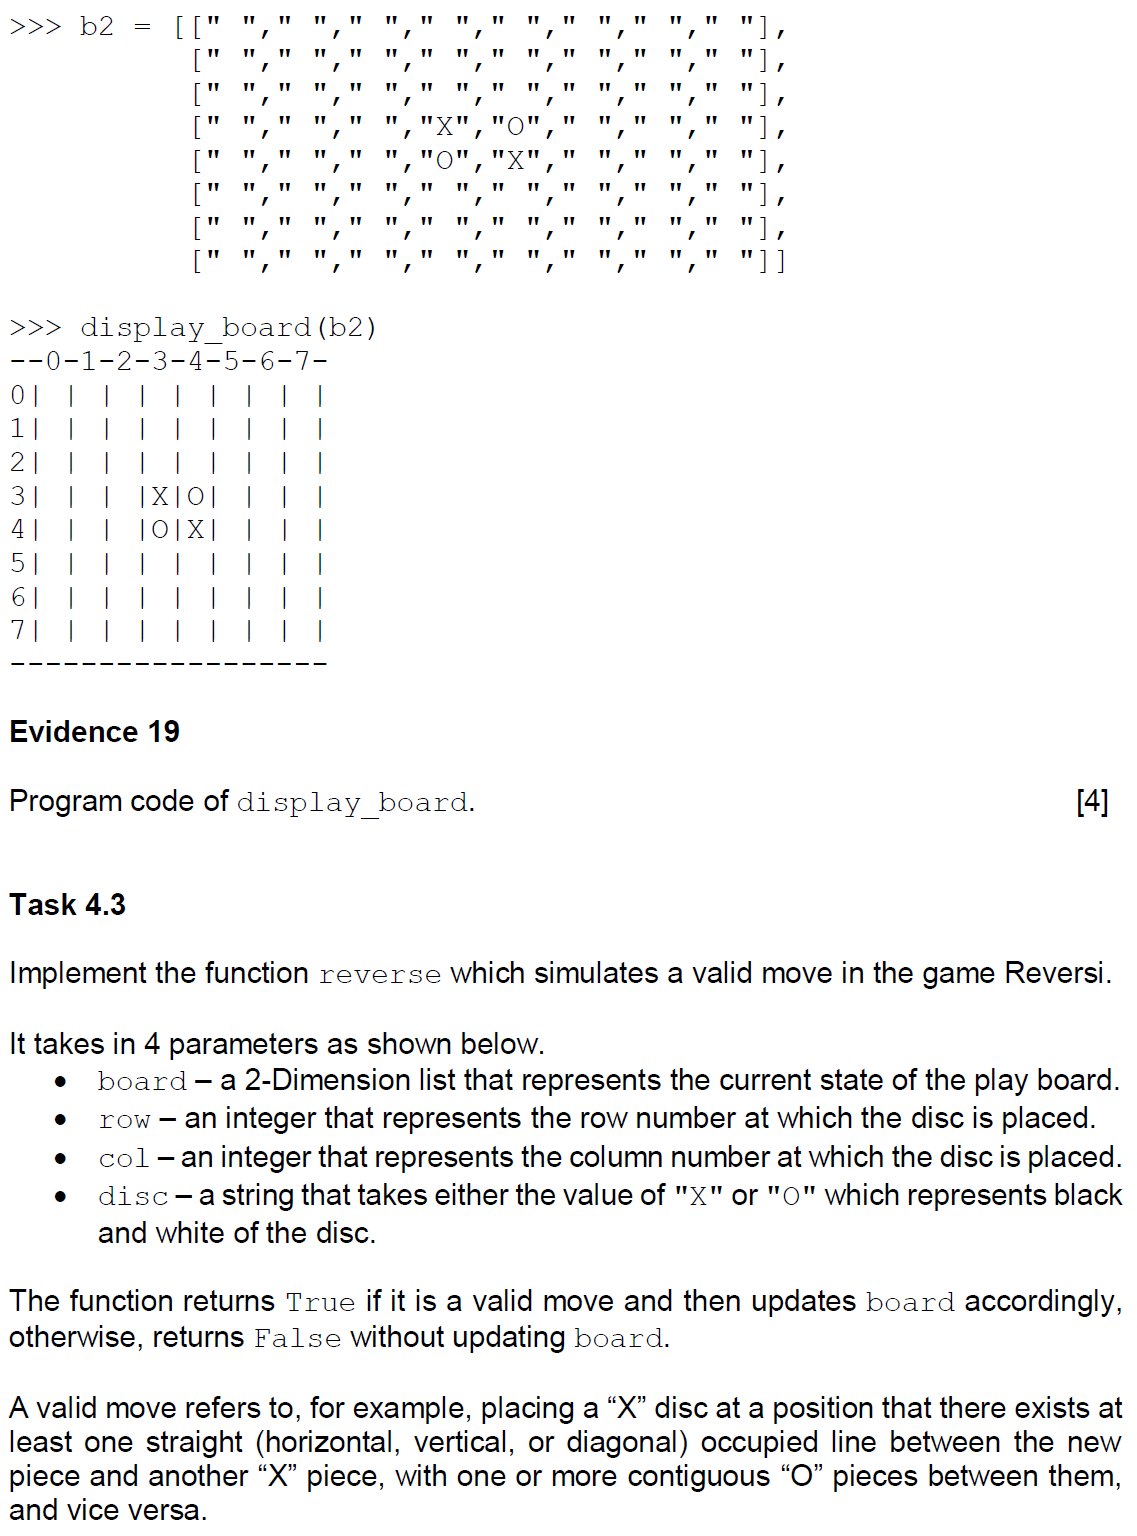

In [6]:
class Reversi:
    def __init__(self, n):
        def init_board(n):
            return [[' ' for _ in range(n)] for _ in range(n)]
        self.board = init_board(n)
        self.size = n
    
    def display_board(self):
        top_str = '--'
        body = ''
        for i in range(self.size):
            top_str += f'{i}-'
        top_str += '\n'
        for y, i in enumerate(self.board):
            body += f'{y}|{"|".join(i)}|\n'
        bottom_str = f'--{"-"*self.size*2}'
        print(top_str+body+bottom_str)
        
    def resolve_coordinates(self, x, y, direction):
            def up(x, y):
                x -= 1
                return x, y
            def down(x, y):
                x += 1
                return x, y
            def left(x, y):
                y -= 1
                return x, y
            def right(x, y):
                y -= 1
                return x, y
            def up_right(x, y):
                x, y = up(x, y)
                x, y = right(x, y)
                return x, y
            def up_left(x, y):
                x, y = up(x, y)
                x, y = left(x, y)
                return x, y
            def down_right(x, y):
                x, y = down(x, y)
                x, y = right(x, y)
                return x, y
            def down_left(x, y):
                x, y = down(x, y)
                x, y = left(x, y)
                return x, y
            lut = {'UP': up,
                  'DOWN': down,
                  'LEFT': left,
                  'RIGHT': right,
                  'UP_RIGHT': up_right,
                  'UP_LEFT': up_left,
                  'DOWN_RIGHT': down_right,
                  'DOWN_LEFT': down_left
                  }
            return lut[direction](x, y)
        
    def get_coordinates(self, x, y, direction):
        x, y = self.resolve_coordinates(x, y, direction)
        return (self.board[y][x], (x,y)) if 0 <= x <= self.size - 1 and 0 <= y <= self.size - 1 else ((None, (x,y)))
    
    def validate(self, x, y, disc):
        opponent = 'X' if disc == 'O' else 'O'
        if self.board[y][x] != ' ': return False
        directions = {'UP': False, 'DOWN': False, 'LEFT': False, 'RIGHT': False, 'UP_RIGHT': False, 'UP_LEFT': False, 'DOWN_RIGHT': False, 'DOWN_LEFT': False}
        for direction in directions.keys():
            new = self.get_coordinates(x, y, direction)
            while True:
                if new[0] == ' ':
                    directions[direction] = False
                    break
                if new[0] == disc:
                    directions[direction] = True
                    break
                if new[0] == None:
                    directions[direction] = False
                    break
                new = self.get_coordinates(new[1][0], new[1][1], direction)
        return True if True in direction.values() else False

    def update(self, x, y, disc):
        def find_my_kind(x, y, disc):
            directions = {'UP': None, 'DOWN': None, 'LEFT': None, 'RIGHT': None, 'UP_RIGHT': None, 'UP_LEFT': None, 'DOWN_RIGHT': None, 'DOWN_LEFT': None}
            for direction in directions.keys():
                new = self.get_coordinates(x, y, direction)
                while True:
                    if new[0] == ' ':
                        break
                    if new[0] == disc:
                        directions[direction] = new[1]
                        break
                    if new[0] == None:
                        break
                    new = self.get_coordinates(new[1][0], new[1][1], direction)
            return directions
        for direction in directions.keys():
            if direction[i] != None:
                cur = self.resolve_coordinates(x, y, direction)
                while cur != direction[i]:
                    self.board[cur[0]][cur[1]] = disc
                    cur = self.resolve_coordinates(cur[0], cur[1], direction)
    
    def reverse(self, x, y, disc):
        if self.validate(x, y, disc):
            self.update(x, y, disc)
            return True
        else:
            return False
    

In [4]:
r = Reversi(3)
r.display_board()

--0-1-2-
0| | | |
1| | | |
2| | | |
--------
